## Compare the F1 between StanfordNER and NeuroNER

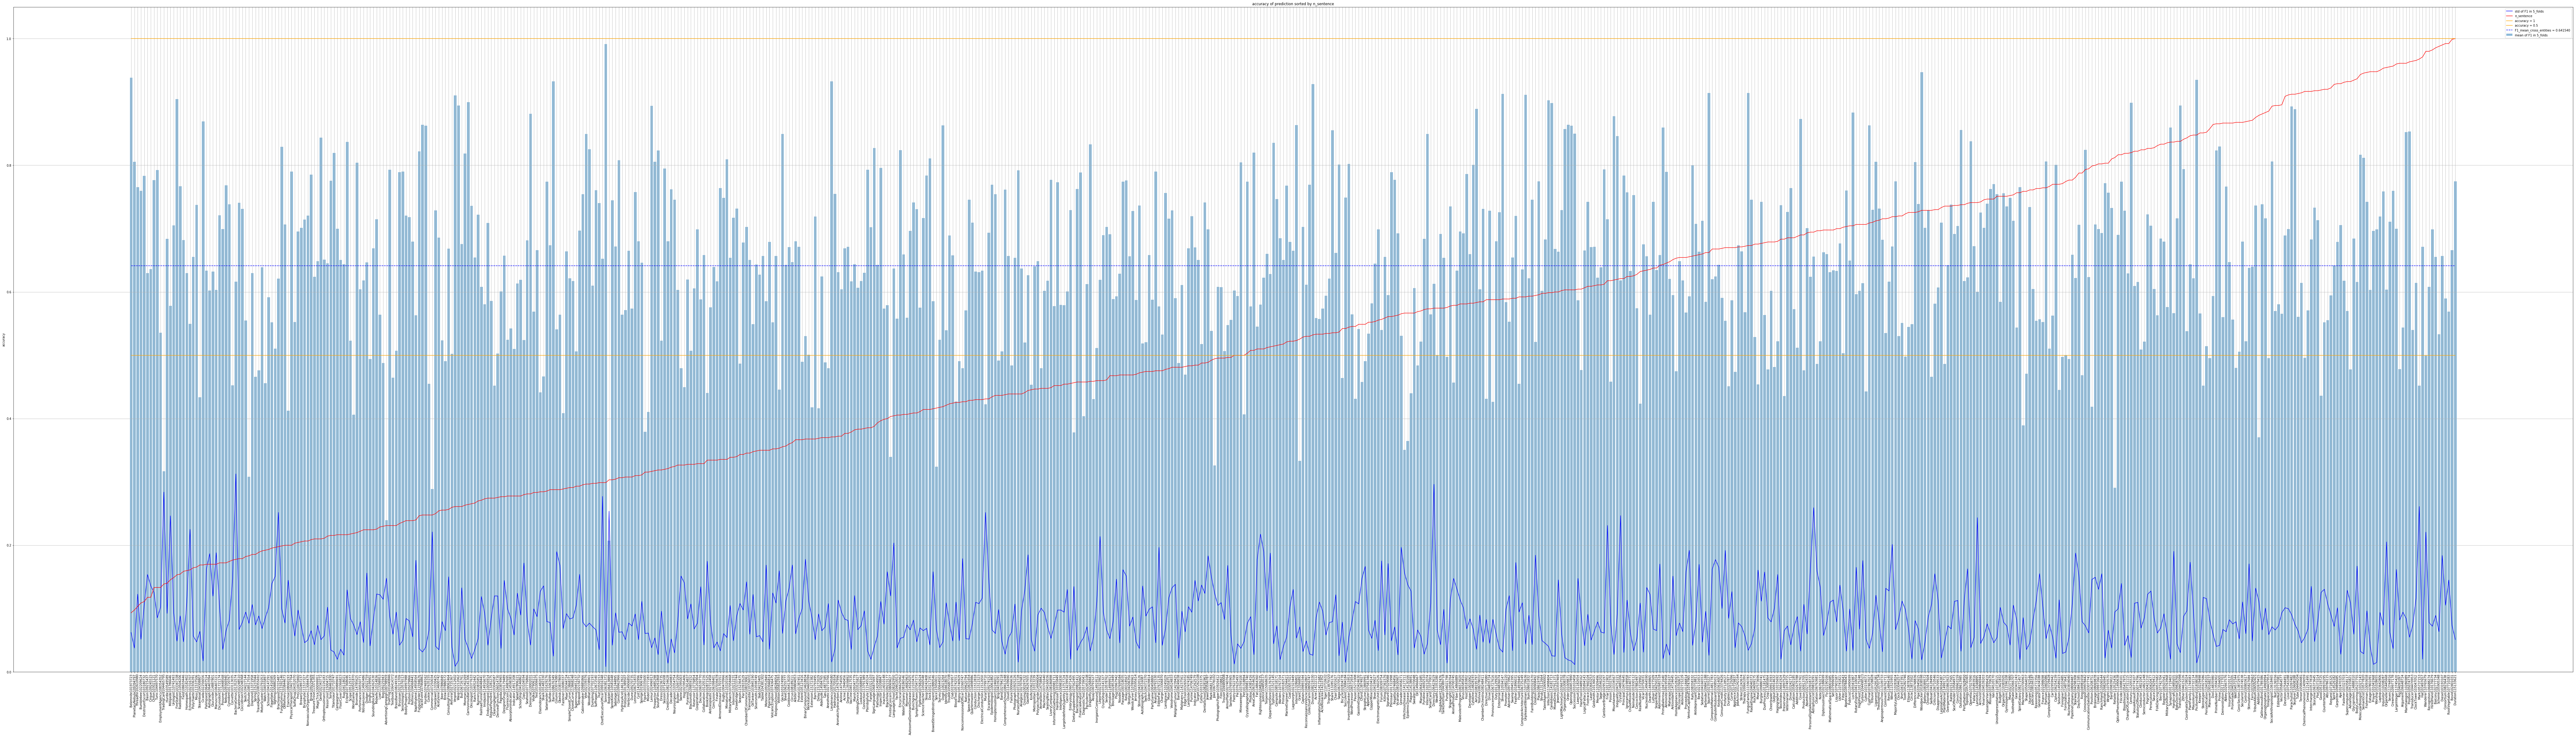

In [146]:
# sorted by n_document/# n_sentence / # sorted by F1_mean
ls_entity = df_all['entity_type'].values
ls_F1_mean = df_all['N_avg'].values
ls_F1_std = df_all['N_std'].values


ls_n_sentence = df_all['n_sentence'].values
ls_n_sentence = ls_n_sentence / max(ls_n_sentence)


ls_n_F1_mean = 0.641540 * np.ones(len(ls_F1_mean))


y_pos = np.arange(len(ls_F1_mean))

fig, ax = plt.subplots(figsize=(150,40)) 
plt.bar(y_pos, ls_F1_mean, align='center', alpha=0.5, label = 'mean of F1 in 5_folds')
plt.plot(y_pos,ls_F1_std, color = 'b', label = 'std of F1 in 5_folds')
# plt.plot(y_pos,ls_R, color = 'black', label = 'mean of R  in 5_folds')
# plt.plot(y_pos,ls_P, color = 'g', label = 'mean of P  in 5_folds')
plt.plot(y_pos,ls_n_sentence, color = 'r', label = 'n_sentence')
plt.plot(y_pos,np.ones(len(ls_F1_mean)), color = 'orange', label = 'accuracy = 1')
plt.plot(y_pos,np.ones(len(ls_F1_mean))/2, color = 'orange', label = 'accuracy = 0.5')

plt.plot(y_pos,ls_n_F1_mean, color = 'b',linestyle = '--',label = 'F1_mean_cross_entities = 0.641540')



plt.xticks(y_pos, ls_entity,rotation='vertical')
plt.ylabel('accuracy')
plt.title('accuracy of prediction sorted by n_sentence')

plt.grid()
plt.legend() 
plt.savefig('NeuroNER_711_F1_sort_by_sentence.pdf')

* the entities is sorted by the number of sentence,like entities in the left have less sentence size.

#### Absolute F1

* reuslts of StanfordNER(Red) and NeuroNER(Blue) overlap in the same x position, 
    * so the if top edge is red, means StanfordNER better than NeuroNER, otherwise it is blue

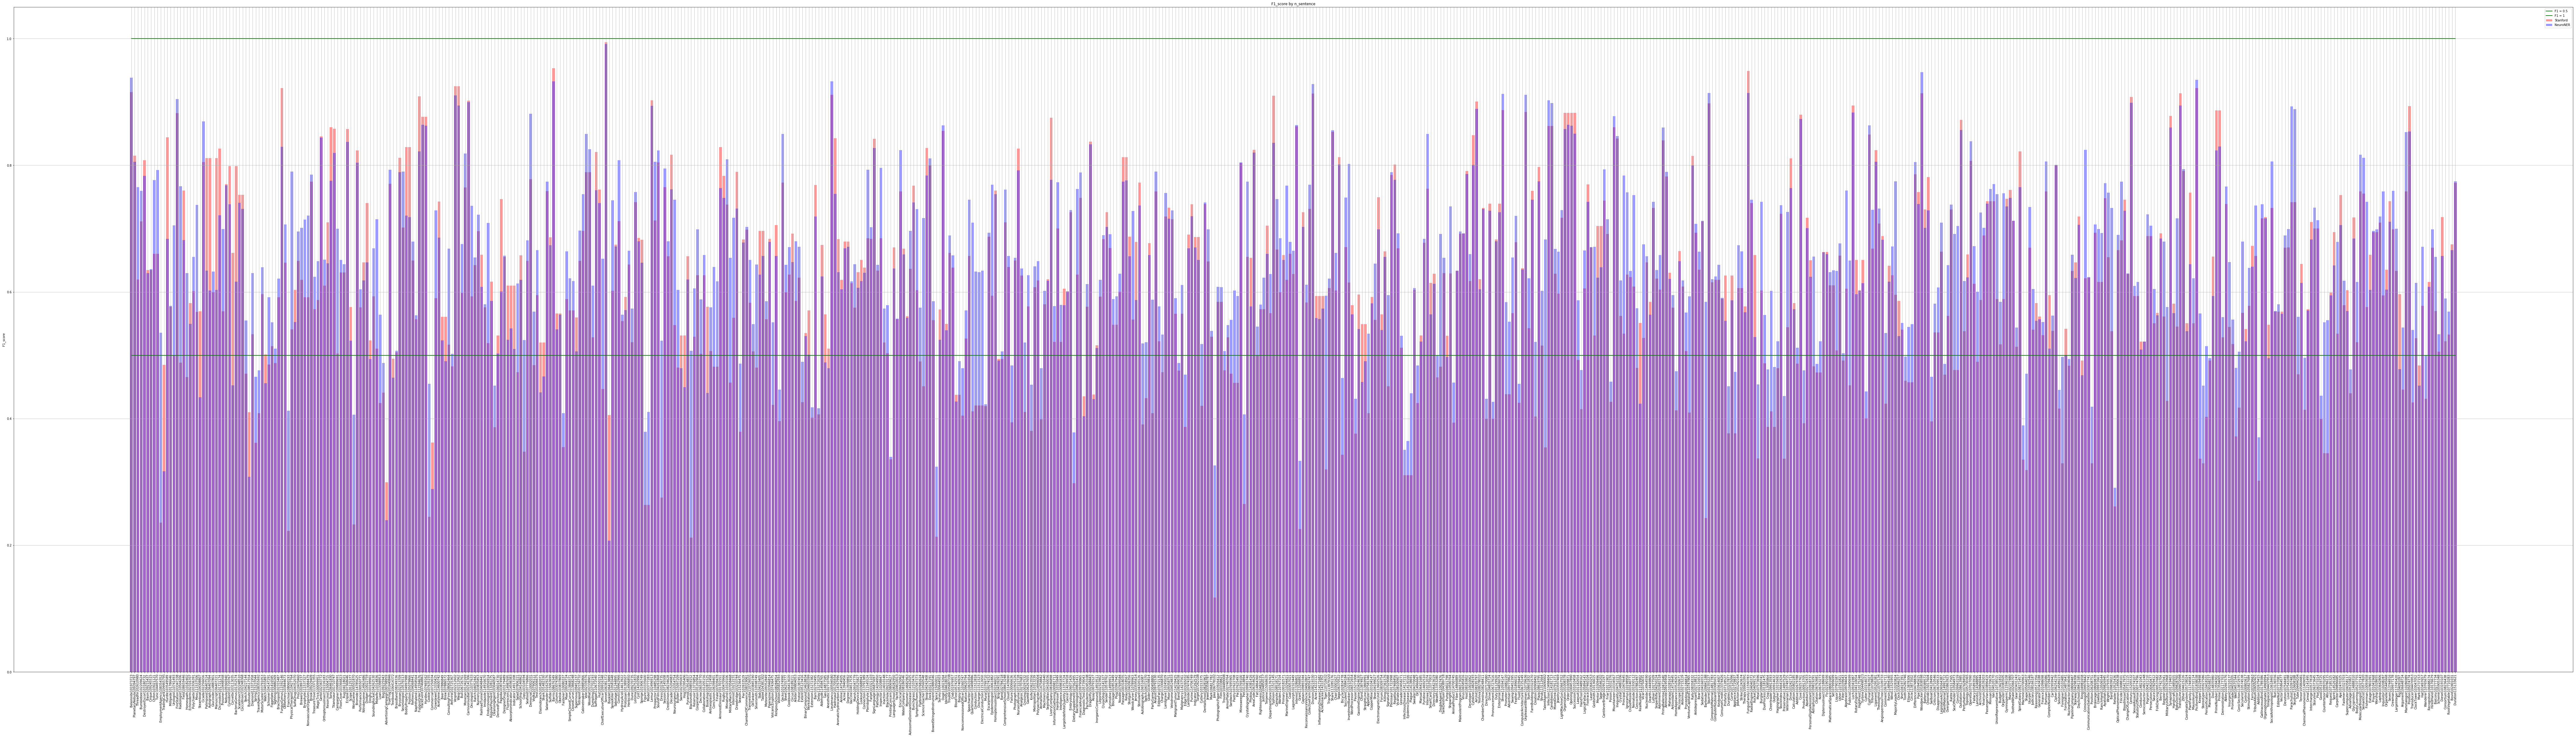

In [151]:
# data
bars1 = df_all['F1_Stanford']
bars2 = df_all['N_avg']
y_pos = np.arange(len(bars1))


fig, ax = plt.subplots(figsize=(150,40)) 
plt.bar(y_pos, bars1, align='center', color = 'r', alpha=0.4, label = 'Stanford')
plt.bar(y_pos,bars2, color = 'b', alpha=0.4,  label = 'NeuroNER')
plt.plot(y_pos,np.ones(len(bars2))/2, color = 'green', label = 'F1 = 0.5', linewidth=2.0)
plt.plot(y_pos,np.ones(len(bars2)), color = 'green', label = 'F1 = 1', linewidth=2.0)

plt.xticks(y_pos, df_all['entity_type'],rotation='vertical')
plt.ylabel('F1_score')
plt.title('F1_score by n_sentence')

plt.grid()
plt.legend()
plt.savefig('711_overlap.pdf')
plt.show()

#### Relative F1:  StanfordNER - NeuroNER
 * the value of each bar is : [StanfordNER F1 - NeuroNER F1]
 
 * so the postive bar means for this entity StanfordNER result better than NeuroNER, and negative bar means NeuroNER is better than StanfordNER.
 
 * the length of the bar is how much the StanfordNER F1 higher than NeuroNER F1

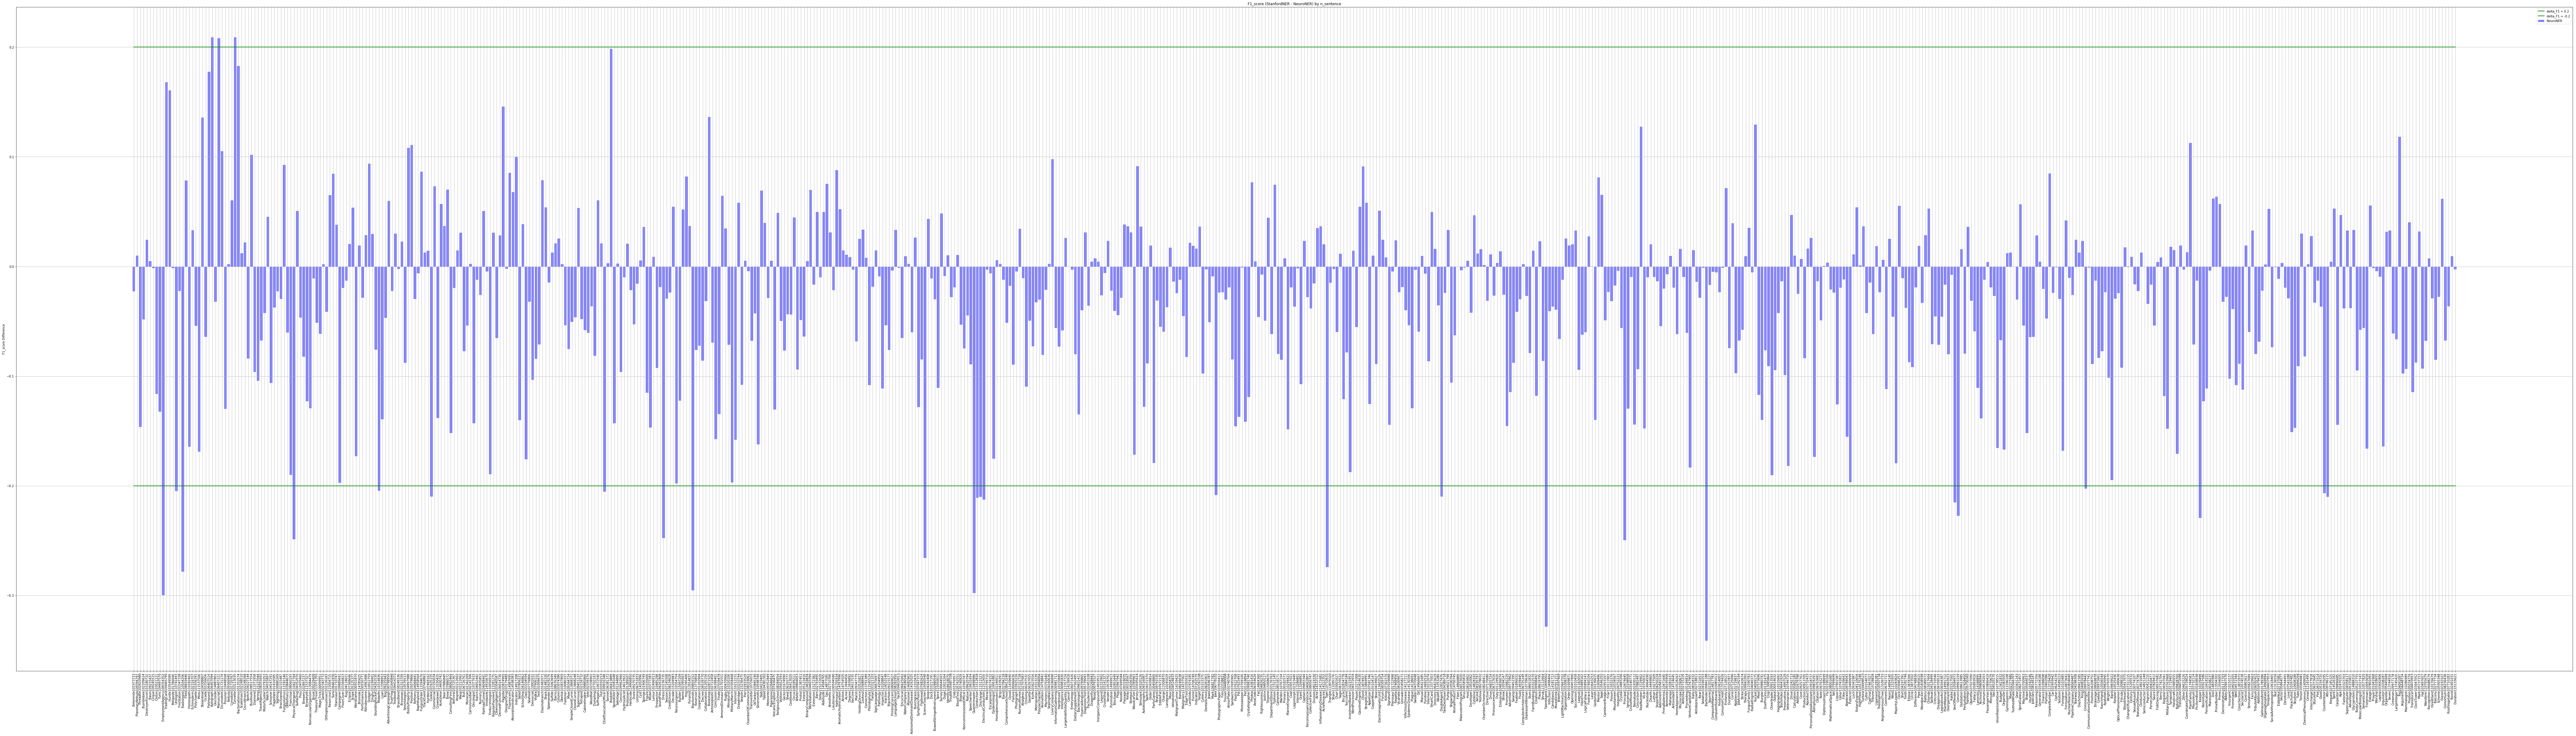

In [150]:
# data
bars1 = df_all['F1_Stanford']
bars2 = df_all['N_avg']
bars3 = bars1 - bars2
y_pos = np.arange(len(bars1))


fig, ax = plt.subplots(figsize=(150,40))


plt.bar(y_pos,bars3, color = 'b', alpha=0.5,  label = 'NeuroNER')

plt.plot(y_pos,np.ones(len(bars2))/5, color = 'green', label = 'delta_F1 = 0.2', linewidth=2.0)
plt.plot(y_pos,np.ones(len(bars2))/5*(-1), color = 'green', label = 'delta_F1 = -0.2', linewidth=2.0)

plt.xticks(y_pos, df_all['entity_type'],rotation='vertical')
plt.ylabel('F1_score Difference')
plt.title('F1_score (StanfordNER - NeuroNER) by n_sentence')

plt.grid()
plt.legend()
plt.savefig('711_substract.pdf')


we can find that

* in general for the majority entities, NeuroNER have better result then StanfordNER. (the number of Negative bar is more than positive bar.)
        
* for thoes entities with moderate sentence size, NeuroNER is more likely to performance better. and the F1 difference is around 0.2. (in the center part of the above figure, most of the bars are negative.)
    
* for thoes entities with largest sentence size, NeuroNER is still better than StanfordNER generally, but the gaps are smaller. (in the right part of the above figure, the length of the bar become short.)

#### the number of entities that StanfordNER F1 better than NeuroNER F1

In [157]:
print('entities that StanfordnER better than NeuroNER:',sum(df_all['S_N'] > 0))
print('entities that NeuroNER better than StanfordnER:',sum(df_all['S_N'] < 0))

entities that StanfordnER better than NeuroNER: 247
entities that NeuroNER better than StanfordnER: 464


#### the average on the entities' F1 that StanfordNER F1 better than  NeuroNER F1

In [158]:
np.mean([x for x in bars3 if x >0])

0.04067846153846154

#### the average on the entities' F1 that NeuroNER F1 better than StanfordNER F1

In [159]:
np.mean([x for x in bars3 if x <0])

-0.07304306034482759